In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/medidas.csv", sep=";")

df_medidas = df.iloc[:, :]

df_results = df_medidas.copy()

df_results["MediaDiametro"] = df_medidas.mean(axis=1)
df_results["DesvioPadrao"] = df_medidas.std(axis=1)

df_results["Raio"] = df_results["MediaDiametro"] / 2

df_results["Volume"] = (4/3) * np.pi * (df_results["Raio"] ** 3)

incerteza = 0.05

df_results["ErroAbsoluto"] = 4 * np.pi * (df_results["Raio"] ** 2) * incerteza

df_results["ErroRelativo"] = (3 * incerteza) / df_results["Raio"]

print(df_results.head())

   Medida1  Medida2  Medida3  Medida4  Medida5  MediaDiametro  DesvioPadrao  \
0    15.38    15.36    15.50    15.54    15.48         15.452      0.078230   
1    14.96    14.86    14.90    14.94    14.92         14.916      0.038471   
2    15.98    16.00    15.88    15.98    15.92         15.952      0.050200   
3    15.18    15.42    15.10    15.44    15.62         15.352      0.210523   
4    15.32    14.98    14.96    14.94    15.38         15.116      0.215128   

    Raio       Volume  ErroAbsoluto  ErroRelativo  
0  7.726  1931.758006     37.505009      0.019415  
1  7.458  1737.623760     34.948185      0.020113  
2  7.976  2125.416488     39.971474      0.018806  
3  7.676  1894.495192     37.021141      0.019541  
4  7.558  1808.461519     35.891668      0.019847  


In [ ]:
df_formatado = df_results.copy()
df_formatado = df_formatado.round(2)

df_formatado = df_formatado.drop(columns=["Medida1", "Medida2", "Medida3", "Medida4", "Medida5"])
df_formatado = df_formatado.map(lambda x: f"{x:.2f}")

df_formatado.insert(0, "Esfera", [f"Esfera {i+1}" for i in range(len(df_formatado))])

latex_code = df_formatado.to_latex("tabela_resultados.tex", caption="Resultados Obtidos", longtable=True, column_format="ccccccc", index=False)

In [ ]:
df = df.map(lambda x: f"{x:.2f}")
latex_code = df.to_latex("tabela_medidas.tex", caption="Medições", longtable=True, column_format="ccccc", index=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

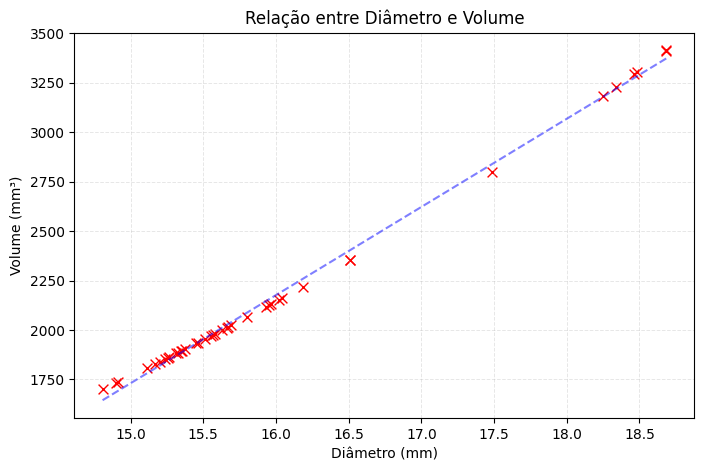

In [ ]:
#Regressão linear (f(x) = ax + b)
a, b = np.polyfit(df_results["MediaDiametro"], df_results["Volume"], 1)

x = np.linspace(df_results["MediaDiametro"].min(), df_results["MediaDiametro"].max(), 100)  # Gera 100 pontos entre o mínimo e o máximo da média dos diâmetros
y = a * x + b

#Volume em função do Diâmetro
plt.figure(figsize=(8, 5))

sns.scatterplot(x=df_results["MediaDiametro"], y=df_results["Volume"], marker="x", color="red", linewidth=1, s=50)

plt.plot(x, y, color="blue", alpha=0.5, linestyle="--")

plt.xlabel("Diâmetro (mm)")
plt.ylabel("Volume (mm³)")

plt.title("Relação entre Diâmetro e Volume")

plt.grid(True, linestyle="--", linewidth=0.7, alpha=0.3)

plt.savefig("Relação entre Diâmetro e Volume.png", dpi=300)
plt.show()

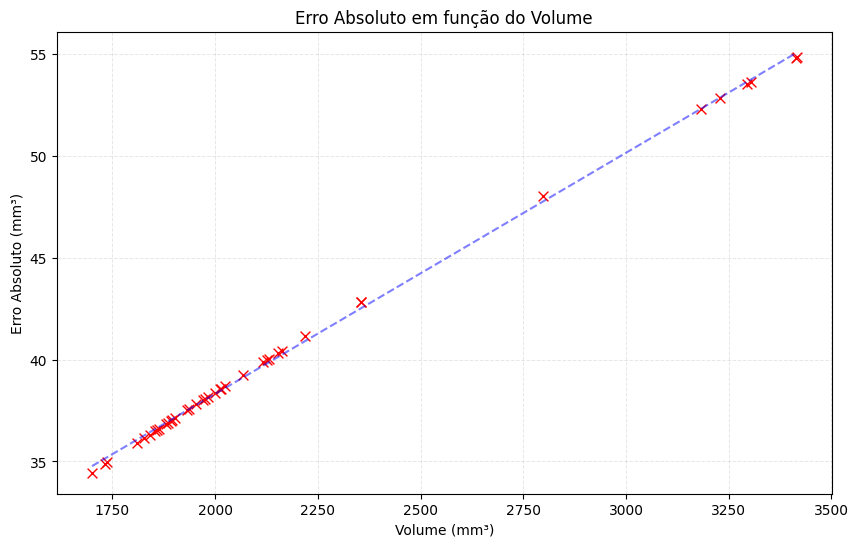

In [ ]:
#Regressão linear (f(x) = ax + b)
a, b = np.polyfit(df_results["Volume"], df_results["ErroAbsoluto"], 1)

x = np.linspace(df_results["Volume"].min(), df_results["Volume"].max(), 100)  # Gera 100 pontos entre o mínimo e o máximo dos volumes
y = a * x + b

#Erro Absoluto em função do Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_results["Volume"], y=df_results["ErroAbsoluto"], marker="x", color="red", linewidth=1, s=50)

plt.plot(x, y, color="blue", alpha=0.5, linestyle="--")

plt.xlabel("Volume (mm³)")
plt.ylabel("Erro Absoluto (mm³)")
plt.title("Erro Absoluto em função do Volume")

plt.grid(True, linestyle="--", linewidth=0.7, alpha=0.3)

plt.savefig("Erro Absoluto em função do Volume.png", dpi=300)
plt.show()

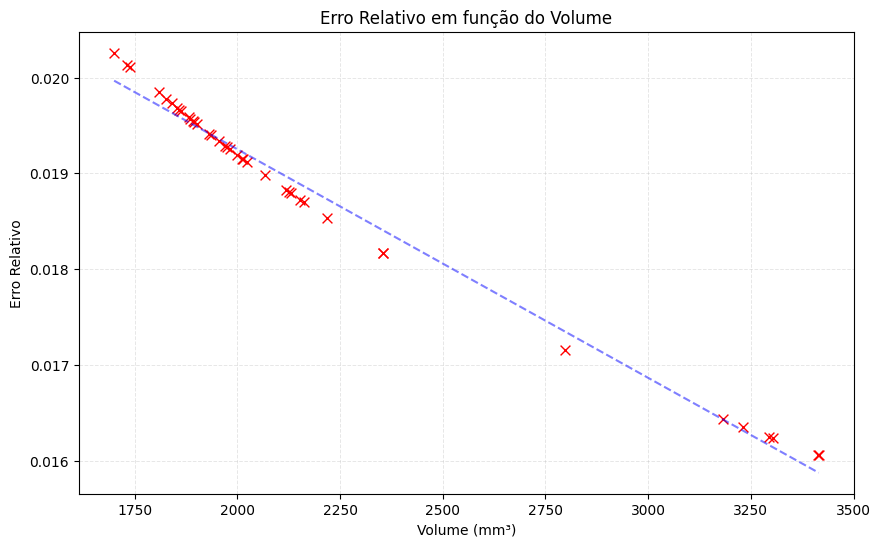

In [ ]:
#Regressão linear (f(x) = ax + b)
a, b = np.polyfit(df_results["Volume"], df_results["ErroRelativo"], 1)

x = np.linspace(df_results["Volume"].min(), df_results["Volume"].max(), 100)  # Gera 100 pontos entre o mínimo e o máximo dos volumes
y = a * x + b

#Erro Relativo em função do Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_results["Volume"], y=df_results["ErroRelativo"], marker="x", color="red", linewidth=1, s=50)

plt.plot(x, y, color="blue", alpha=0.5, linestyle="--")

plt.xlabel("Volume (mm³)")
plt.ylabel("Erro Relativo")
plt.title("Erro Relativo em função do Volume")

plt.grid(True, linestyle="--", linewidth=0.7, alpha=0.3)

plt.savefig("Erro Relativo em função do Volume.png", dpi=300)
plt.show()